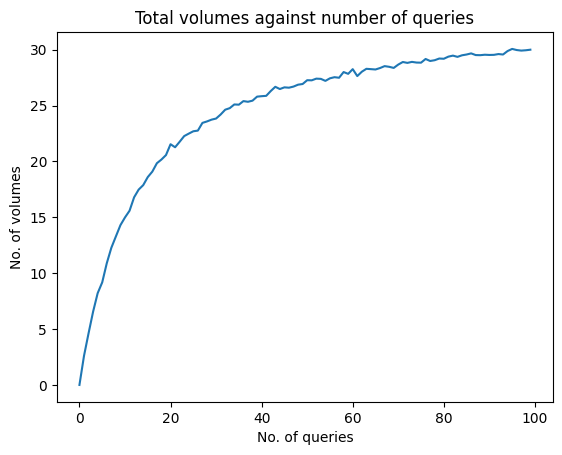

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

LOGmax = 16

def cover_query(start, end):
    result = []
    
    def cover(start, end, node_start, node_end):
        if start > node_end or end < node_start:
            return
        if start <= node_start and end >= node_end:
            result.append((node_start, node_end))
            return
        
        mid = (node_start + node_end) // 2
        cover(start, end, node_start, mid)
        cover(start, end, mid + 1, node_end)
    
    cover(start, end, 1, LOGmax)
    return result

def const_query(num_of_qry):
    total_vols = 0
    all_combinations = {(start, end) for start in range(1, LOGmax + 1) for end in range(start, LOGmax + 1)}

    for _ in range(100):
        vol_tracker = set()
        vol_sum = 0
        parent = all_combinations.copy()
        for _ in range(num_of_qry):
            query_range = random.choice(list(parent))
            parent.remove(query_range)
            
            nodes_covered = cover_query(query_range[0], query_range[1])
            
            for child in nodes_covered:
                if child not in vol_tracker:
                    vol_tracker.add(child)
                    vol_sum += 1
        
        total_vols += vol_sum

    return total_vols / 100

x_axis = []
y_axis = []
for v in range(0, 100):
    x_axis.append(v)
    y_axis.append(const_query(v))

plt.plot(x_axis, y_axis)
plt.xlabel("No. of queries")
plt.ylabel("No. of volumes")
plt.title("Total volumes against number of queries")
plt.show()